In [1]:
import pandas as pd
import numpy as np
from functools import reduce

In [4]:
df = pd.read_excel('PolicyTools.xlsx', index_col=0).iloc[:,4:]

<IPython.core.display.Javascript object>


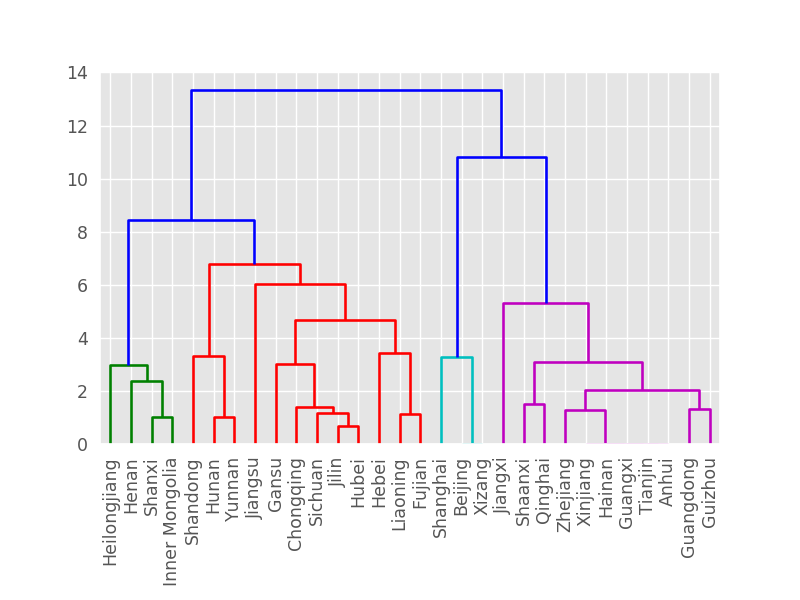

In [12]:
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import AgglomerativeClustering, KMeans

X1 = df[['ts_rp','as_rp','ts_unify','as_unify','ts_intall','as_intall']]
X2 = df[['ts_rp','as_rp','ts_unify','as_unify','ts_insr','as_insr','ts_ser','as_ser']]

def clustering(X,n):
    clsmodel = AgglomerativeClustering(n_clusters=n, linkage='ward').fit(X)
    clusters = pd.DataFrame({'cluster':clsmodel.fit_predict(X)}, index = df.index[:])

    return clusters

def plot_dendrogram(X,threshold):   
    plt.style.use('ggplot')
    %matplotlib notebook

    proname = {11:'Beijing',12:"Tianjin",13:'Hebei',14:'Shanxi',15:'Inner Mongolia',21:'Liaoning',22:'Jilin',23:'Heilongjiang',
              31:'Shanghai',32:'Jiangsu',33:'Zhejiang',34:'Anhui',35:'Fujian',36:'Jiangxi',37:'Shandong',41:'Henan',42:'Hubei',
               43:'Hunan',44:'Guangdong',45:'Guangxi',46:'Hainan',50:'Chongqing',51:'Sichuan',52:'Guizhou',53:'Yunnan',54:'Xizang',
              61:'Shaanxi',62:'Gansu',63:'Qinghai',65:'Xinjiang'}

    from scipy.cluster.hierarchy import ward, dendrogram
    plt.figure()
    dendrogram(ward(X), labels=[proname[province] for province in df.index[:]], color_threshold=threshold)
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
    plt.subplots_adjust(bottom=0.26)
    plt.gca().tick_params(bottom=False,left=False)
    plt.show()

plot_dendrogram(X2,8)

In [13]:
# Choice of cluster number: validation statistic

from sklearn.metrics import silhouette_score as sh, calinski_harabaz_score as ch, davies_bouldin_score as db

def stat(X, alg_score, name = None):
    if alg_score == ch:
        scores = [0.01*(alg_score(X,clustering(X,i)['cluster'])) for i in range(2,30)]
    else:
        scores = [alg_score(X,clustering(X,i)['cluster']) for i in range(2,30)]
    
    #return pd.DataFrame({"No.of clusters":range(2,30), "Statistics":scores}) // For illustration purpose
    
    return scores

def plot_stat(X):
    fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    ax1.plot(range(2,30), stat(X, sh), color='#CD6155',label='Silhouette score')
    ax1.plot(range(2,30), stat(X, db), color='#AF7AC5', label='Davies Bouldin score')
    ax1.plot(range(2,30), stat(X, ch), color='#7FB3D5', label='Calinski haradaz score')

    ax1.set_ylim([0,1.0])
    ax1.set_xticks([2,3,4,5,10,15,20,25,30])

    ax2.plot(range(2,6), stat(X, sh)[:4], color='#CD6155',label='Silhouette score')
    ax2.plot(range(2,6), stat(X, db)[:4], color='#AF7AC5', label='Davies Bouldin score')
    ax2.plot(range(2,6), stat(X, ch)[:4], color='#7FB3D5', label='Calinski haradaz score')

    ax2.set_xticks([2,3,4,5])


    for spine in ['top', 'right']:
        ax1.spines[spine].set_visible(False)
        ax2.spines[spine].set_visible(False)

    fig.text(0.5,0.02,'Number of Clusters', ha='center',fontsize=10)
    #fig.subplots_adjust(bottom=0.11)
    fig.suptitle('Integraion Clustering Indices\n rp, unify, insurances, service', fontsize=10)
    plt.legend()
